# Homework 6
## Joseph Hickey
### 3/4/2020
### A function which loops through all the snapshots of a galaxy to find it's COM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from ReadFile import Read
from CenterOfMass import CenterOfMass

In [12]:
def OrbitCOM(galaxy,start=0,end=800,n=5):
    
    
    
    
    fileout = 'Orbit_' + galaxy + '.txt'
    
    delta = 0.1
    VolDec = 4.
    
    
#    if snap_ids.size > 0:
    snap_ids = np.arange(start,end,n)
    
    orbit = np.zeros([len(snap_ids),7])
    
    for i, snap_id in enumerate(snap_ids):
        #Construct filename
        filename = './Snapshots/' + galaxy + '_' + str(snap_id).zfill(3) + '.txt'
        
        gal = CenterOfMass(filename,2)
        orbit[i,0] = gal.time.value/1000.
        orbit[i,1:4] = (gal.COM_P(delta,VolDec)).value
        orbit[i,4:] = (gal.COM_V(orbit[i,1],orbit[i,2],orbit[i,3])).value
        print(str(i+1) + '/' + str(int((end-start)/n)))
        
    np.savetxt(fileout,orbit,header='t x y z vx vy vz',comments='#',fmt=['%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])
    print('Finished saving file: ' + fileout)
    
    

In [14]:
OrbitCOM('MW')
OrbitCOM('M31')
OrbitCOM('M33')

1/160
2/160
3/160
4/160
5/160
6/160
7/160
8/160
9/160
10/160
11/160
12/160
13/160
14/160
15/160
16/160
17/160
18/160
19/160
20/160
21/160
22/160
23/160
24/160
25/160
26/160
27/160
28/160
29/160
30/160
31/160
32/160
33/160
34/160
35/160
36/160
37/160
38/160
39/160
40/160
41/160
42/160
43/160
44/160
45/160
46/160
47/160
48/160
49/160
50/160
51/160
52/160
53/160
54/160
55/160
56/160
57/160
58/160
59/160
60/160
61/160
62/160
63/160
64/160
65/160
66/160
67/160
68/160
69/160
70/160
71/160
72/160
73/160
74/160
75/160
76/160
77/160
78/160
79/160
80/160
81/160
82/160
83/160
84/160
85/160
86/160
87/160
88/160
89/160
90/160
91/160
92/160
93/160
94/160
95/160
96/160
97/160
98/160
99/160
100/160
101/160
102/160
103/160
104/160
105/160
106/160
107/160
108/160
109/160
110/160
111/160
112/160
113/160
114/160
115/160
116/160
117/160
118/160
119/160
120/160
121/160
122/160
123/160
124/160
125/160
126/160
127/160
128/160
129/160
130/160
131/160
132/160
133/160
134/160
135/160
136/160
137/160
138/160
139/

In [35]:
def VectorDiff(vec1,vec2):
    dif = np.asarray(vec1) - np.asarray(vec2)
    mag = np.sqrt(dif[0]**2 + dif[1]**2 + dif[2]**2)
    return mag

In [44]:
MW = np.genfromtxt('Orbit_MW.txt',comments='#',names=True)
M31 = np.genfromtxt('Orbit_M33.txt',comments='#',names=True)
M33 = np.genfromtxt('Orbit_M31.txt',comments='#',names=True)

In [56]:
#mwcom = np.asarray()

mwm31dist = VectorDiff([MW['x'],MW['y'],MW['z']],[M31['x'],M31['y'],M31['z']])
mwm31vel = VectorDiff([MW['vx'],MW['vy'],MW['vz']],[M31['vx'],M31['vy'],M31['vz']])

m33m31dist = VectorDiff([M33['x'],M33['x'],M33['x']],[M31['x'],M31['y'],M31['z']])
m33m31vel = VectorDiff([M33['vx'],M33['vy'],M33['vz']],[M31['vx'],M31['vy'],M31['vz']])


Text(0.5,1,'Distance between MW and M31 over time')

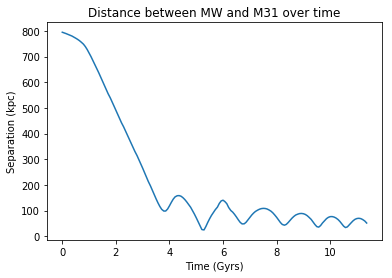

In [69]:
plt.plot(MW['t'],mwm31dist)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Separation (kpc)')
plt.title('Distance between MW and M31 over time')

Text(0.5,1,'Distance between M33 and M31 over time')

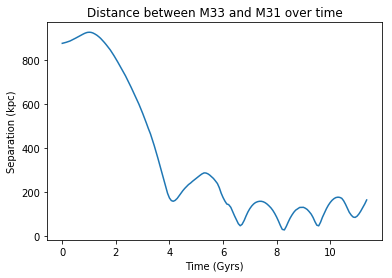

In [71]:
plt.plot(M33['t'],m33m31dist)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Separation (kpc)')
plt.title('Distance between M33 and M31 over time')

Text(0.5,1,'Relative velocity of MW and M31 over time')

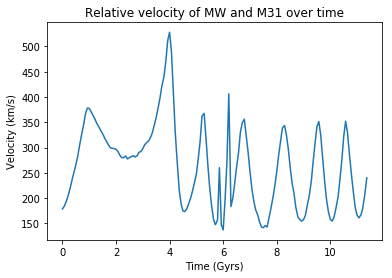

In [66]:
plt.plot(MW['t'],mwm31vel)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Relative velocity of MW and M31 over time')

Text(0.5,1,'Relative velocity of M33 and M31 over time')

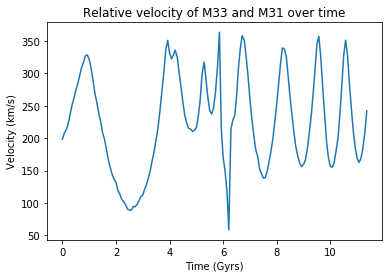

In [65]:
plt.plot(M33['t'],m33m31vel)
plt.xlabel('Time (Gyrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Relative velocity of M33 and M31 over time')

## Question 1:  
  
The Milky Way and Andromeda galaxies will have 6 close encounters over the 12 Gyr period

## Question 2:
  
Relative velocity is inversely related to separation since the potential energy of the galaxies decreases and kinetic energy increases as the separation decreases.

## Question 3:
  
The Milky Way and Andromeda galaxies merge after about 6 Gyrs at which point, M33 is dragged into the now greater potential well of the merger product.

## Question 4:
  
The decay rate is about 40 kpc / Gyr.  
At this rate, M33 will merge with the Milky Way-Andromeda remnant within 2 Gyr.